In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')
import seaborn as sns

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=2.2)

### Show 1D movement:

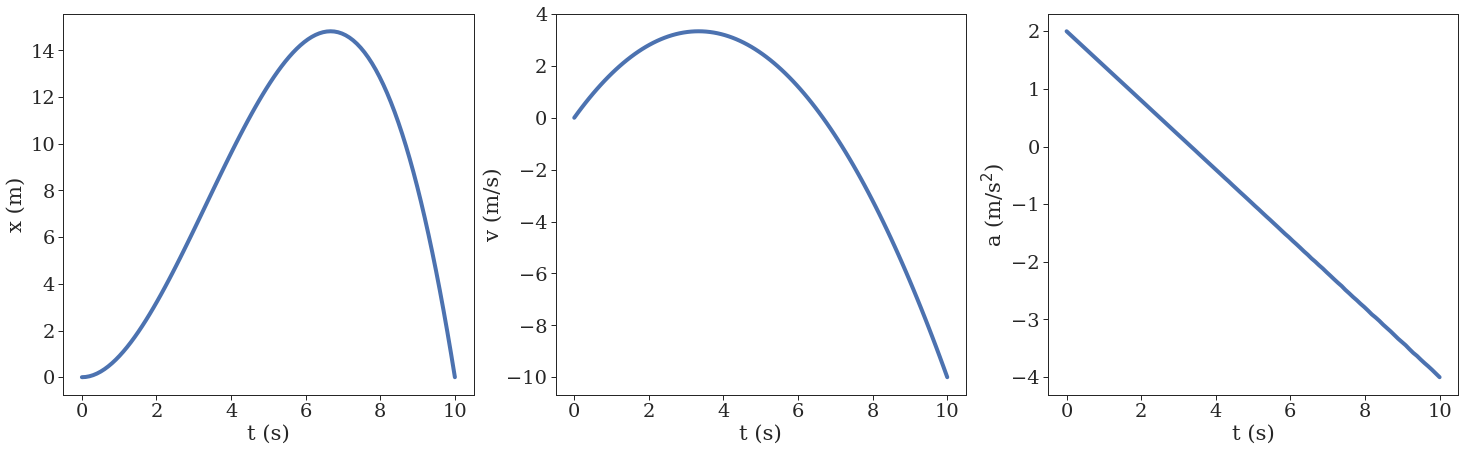

In [3]:
tmin = 0.
tmax = 10.

xF = lambda t: t**2 - 0.1*t**3
vF = lambda t: scipy.misc.derivative(xF,t,dx=1e-6)
aF = lambda t: scipy.misc.derivative(vF,t,dx=1e-6)
tpts = np.linspace(tmin,tmax,100)

fig = plt.figure(figsize=(25,7))
plt.subplot(131)
plt.plot(tpts,xF(tpts),linewidth=4)
xlabel = plt.xlabel('t (s)')
ylabel = plt.ylabel('x (m)')
plt.subplot(132)
plt.plot(tpts,vF(tpts),linewidth=4)
xlabel = plt.xlabel('t (s)')
ylabel = plt.ylabel('v (m/s)')
plt.subplot(133)
plt.plot(tpts,aF(tpts),linewidth=4)
xlabel = plt.xlabel('t (s)')
ylabel = plt.ylabel(r'a (m/s$^2$)')

### Compute position from velocity

In [4]:
fig = plt.figure(figsize=(20,7))
ax1 = plt.subplot(121)
ax1.plot(tpts,vF(tpts),linewidth=4)
ax1.plot([tmin,tmax],[0.,0.],'--',linewidth=1.5,color='black')
xlabel = ax1.set_xlabel('t (s)')
ylabel = ax1.set_ylabel('v (m/s)')
ax2 = plt.subplot(122)
ax2.plot(tpts,xF(tpts),linewidth=4)
xlabel = ax2.set_xlabel('t (s)')
ylabel = ax2.set_ylabel('x (m/s)')
dt = 1.0
tA = 0.
tB = tA + dt
vA, vB = vF(tA), vF(tB)
tlist = [tA,tB]
vm = vF(tA)
line2, = ax1.fill([tA,tA,tB,tB],[0.,vm,vm,0.],'--',linewidth=2,alpha=0.4)
pts, = ax1.plot([tA,tB],[vA,vB],'o',markersize=10)
text = ax1.text(0, -5, "")
xpts = [0.]
xpts.append(xpts[-1]+vm*dt)
pts2, = ax2.plot(tlist,xpts,'o--',markersize=10,linewidth=2)

def init():
    line2.set_xy([(0.,0.)])
    pts.set_data([], [])
    pts2.set_data([],[])
    text.set_text("")
    return (line2,pts,pts2)
def animate(i):
    tlist = np.linspace(tmin,tmin+dt*(i+1),i+2,endpoint=True)
    vlist = vF(tlist)
    pts.set_data(tlist,vlist)
    tA, tB = tlist[-2],tlist[-1]
    vm = (vF(tB)+vF(tA))/2.
    line2.set_xy([(tA,0.),(tA,vm),(tB,vm),(tB,0.)])
    text.set_text(r'$\bar{v}=%1.2f$ m/s, $\Delta x = %1.2f$ m' %(vm,vm*dt))
    xlist = [0.]
    for i,v in enumerate(vlist[:-1]):
        vm = (vlist[i+1]+v)/2.
        xlist.append(xlist[-1]+vm*dt)
    pts2.set_data(tlist,xlist)    
    return (line2,pts,pts2)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int((tmax-tmin)/dt), interval=600, 
                               blit=True)
plt.close()
anim

### Compute velocity from accelaration

In [5]:
fig = plt.figure(figsize=(20,7))
ax1 = plt.subplot(121)
ax1.plot(tpts,aF(tpts),linewidth=4)
ax1.plot([tmin,tmax],[0.,0.],'--',linewidth=1.5,color='black')
xlabel = ax1.set_xlabel('t (s)')
ylabel = ax1.set_ylabel(r'a (m/s$^2$)')
ax2 = plt.subplot(122)
ax2.plot(tpts,vF(tpts),linewidth=4)
xlabel = ax2.set_xlabel('t (s)')
ylabel = ax2.set_ylabel('v (m/s)')
ax2.set_ylim(-10.,8.)
dt = 1.
tA = 0.
tB = tA + dt
aA, aB = aF(tA), aF(tB)
tlist = [tA,tB]
am = aF(tA)
line2, = ax1.fill([tA,tA,tB,tB],[0.,am,am,0.],'--',linewidth=2,alpha=0.4)
pts, = ax1.plot([tA,tB],[aA,aB],'o',markersize=10)
vpts = [0.]
vpts.append(vpts[-1]+am*dt)
pts2, = ax2.plot(tlist,vpts,'o--',markersize=10,linewidth=2)

def init():
    line2.set_xy([(0.,0.)])
    pts.set_data([], [])
    pts2.set_data([],[])
    return (line2,pts,pts2)
def animate(i):
    tlist = np.linspace(tmin,tmin+dt*(i+1),i+2,endpoint=True)
    alist = aF(tlist)
    pts.set_data(tlist,alist)
    tA, tB = tlist[-2],tlist[-1]
    am = (aF(tB)+aF(tA))/2.
    line2.set_xy([(tA,0.),(tA,am),(tB,am),(tB,0.)])
    vlist = [0.]
    for i,a in enumerate(alist[:-1]):
        am = (alist[i+1]+a)/2.
        vlist.append(vlist[-1]+am*dt)
    pts2.set_data(tlist,vlist)    
    return (line2,pts,pts2)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int((tmax-tmin)/dt), interval=600, 
                               blit=True)
plt.close()
anim